<a href="https://colab.research.google.com/github/hrishikesav/machine-learning/blob/master/Retail_CNN_Hrishi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A CNN to predict the fashion object**



In [0]:
# 1) Import TensorFlow 2.0 GPU - latest available version
!pip install tensorflow-gpu

In [0]:
# 2) Import Libraries for model training
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


In [0]:
# 3) Import training fashion data from MNIST

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# 3-b) Reshape the input data to 4 dims

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [0]:
# 4) Verify imported training data
X_train.shape

#X_test.shape
#len(y_test)
#y_test

(60000, 28, 28, 1)

In [0]:
# 5) Preprocess the data to scale the pixel values between 0 & 1

X_train = X_train / 255.0

X_test = X_test / 255.0



In [0]:
# 6) Train the model - Type 1

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),       # transforms 2D array into 1D array
    keras.layers.Dense(128, activation='relu'),       # Hidden layer 1
    keras.layers.Dense(10, activation='softmax')      # Output layer
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
# 6) Train the model - Type 2

model = keras.Sequential([
    keras.layers.Convolution2D(64,3,3,input_shape=(28,28,1), activation='relu'),  # 64 - no of filters. 3,3 - rows & columns in the filter
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Convolution2D(64,3,3, activation='relu'),  # Second convolution/pooling layer added to obtain more accuracy
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),             # hidden layer
    keras.layers.Dense(10, activation='softmax')            # output layer
])

In [0]:
# 6) Train the model - Type 3 - ResNet

from tensorflow.keras import layers

def res_net_block(input_data, filters, conv_size):
  x = layers.Convolution2D(filters, conv_size, activation='relu', padding='same')(input_data)
  x = layers.BatchNormalization()(x)
  x = layers.Convolution2D(filters, conv_size, activation=None, padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Add()([x, input_data])
  x = layers.Activation('relu')(x)
  return x

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Convolution2D(32, 3, activation='relu')(inputs)
x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(3)(x)

num_res_net_blocks = 10
for i in range(num_res_net_blocks):
  x = res_net_block(x, 64, 3)

x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs, outputs)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
# 6-b) Image augmentaion - Optional
# If the training sample is less, we can use this to create additional samples that then will be used at the time of training
# https://keras.io/preprocessing/image/

In [0]:
# 7) Compile the model

model.compile(optimizer='adam',                           # how the model weight is updated based in the loss function, adam is a stochastic gradient descent algorithm
              loss='sparse_categorical_crossentropy',     # to check how accurate the model is during training (types - binary_crossentropy)
              metrics=['accuracy'])                       # to monitor training and testing steps

In [0]:
# 8) Train the model

history = model.fit(X_train, y_train, validation_split=0.33, epochs=5)

Train on 40199 samples, validate on 19801 samples
Epoch 1/5
40199/40199 [==============================] - 538s 13ms/sample - loss: 0.3827 - acc: 0.8631 - val_loss: 0.3256 - val_acc: 0.8823
Epoch 2/5
40199/40199 [==============================] - 540s 13ms/sample - loss: 0.3243 - acc: 0.8842 - val_loss: 0.3232 - val_acc: 0.8871
Epoch 3/5
40199/40199 [==============================] - 544s 14ms/sample - loss: 0.2919 - acc: 0.8964 - val_loss: 0.3567 - val_acc: 0.8810
Epoch 4/5
40199/40199 [==============================] - 542s 13ms/sample - loss: 0.2620 - acc: 0.9066 - val_loss: 0.2586 - val_acc: 0.9075
Epoch 5/5
40199/40199 [==============================] - 543s 14ms/sample - loss: 0.2439 - acc: 0.9109 - val_loss: 0.2477 - val_acc: 0.9078


In [0]:
# 9) Test the model

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 29s - loss: 0.2668 - acc: 0.9060

Test accuracy: 0.906


In [0]:
# 10) Sample prediction for all test images

predictions = model.predict(X_test)

In [0]:
# 11) Check sample prediction

# predictions contains array of all input labels and confidence value of each

pred_ind = np.argmax(predictions[0]) # Get the index with the highest confidenace value

print(f'\n Predicted item - {class_names[pred_ind]}')



 Predicted item - Ankle boot


In [0]:
# 12) Load images to predict

!pip install Pillow
import PIL
from google.colab import files
from PIL import Image
import numpy
import os
import zipfile
import io
import cv2

uploaded = files.upload()
type(uploaded)

fileName = None
for item in uploaded :
  fileName = item
  print(f'Item is : {item}')


data = zipfile.ZipFile(io.BytesIO(uploaded[fileName]), 'r')
data.extractall()

#X_pred = numpy.array([[]])
#X_pred = numpy.empty_like(X_train)
image_size = (28,28)

directory = os.fsencode("IMG")
num_arr1 = []

i = 0
for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith(".png") or filename.endswith(".jpg") :
        # print(os.path.join(directory, filename))
        print(filename)
        #im = Image.open("IMG/" + filename)
        im = cv2.imread("IMG/" + filename,0)
        #w_old,h_old = im.size 
        #print(f'Old size is {w_old} * {h_old}')
        #im = im.resize(image_size)
        resized = cv2.resize(im, (28,28), interpolation = cv2.INTER_AREA)
        #w_new,h_new = im.size 
        #print(f'New size is {w_new} * {h_new}')
        num_arr1.append(resized)
        i = i + 1
        continue

X_pred = numpy.asarray(num_arr1) 


KeyError: ignored

In [0]:
# Reshape the input data to 4 dims

X_pred = X_pred.reshape(X_pred.shape[0], 28, 28, 1)

In [0]:
# 13) Preprocess data
X_pred = X_pred / 255.0

In [0]:
# 14) Test new predictions

predictions_new = model.predict(X_pred)

In [0]:
# Cleanup

predictions_new = None
X_pred = None

import shutil
shutil.rmtree("IMG")

import os
#os.remove("IMG.zip")
!ls

sample_data


In [0]:
# 14) Verify predicted value

# predictions contains array of all input labels and confidence value of each

pred_ind0 = np.argmax(predictions_new[0]) # Get the index with the highest confidenace value

print(f'\n Predicted item - {class_names[pred_ind0]}')


 Predicted item - Sandal


In [0]:
# See the graph parameters available

history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


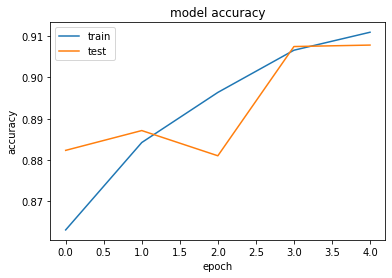

In [0]:
# 15) Accuracy graph
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

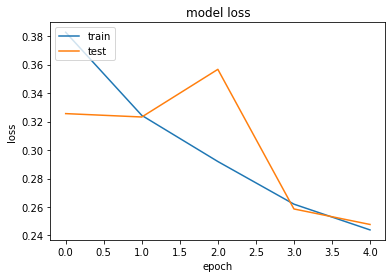

In [0]:
# 16) Loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**The End**

In [0]:
num_arr1 = []
im = cv2.imread("IMG/ab.png",0)
resized = cv2.resize(im, (28,28), interpolation = cv2.INTER_AREA)
num_arr1.append(resized)
X_pred = numpy.asarray(num_arr1)


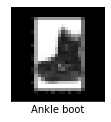

In [0]:
plt.figure(figsize=(10,10))
for i in range(1):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_pred[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [0]:
!mkdir IMG

In [0]:
!ls

IMG  sample_data


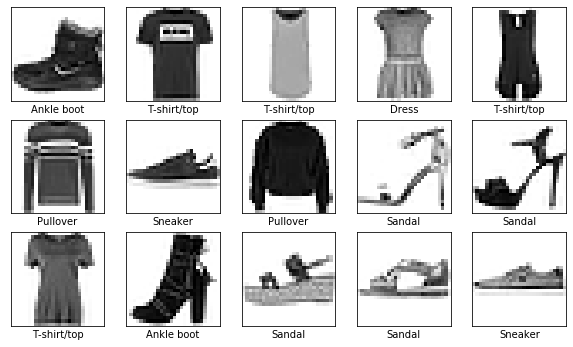

In [0]:
# See some images to verify

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
    #plt.savefig("IMG/ab.png")
plt.show()

In [0]:
import cv2
im = cv2.imread("IMG/B1.png",0)

resized = cv2.resize(im, (28,28), interpolation = cv2.INTER_AREA)
print(type(resized))

num_arr1 = []
num_arr1.append(resized)
#num_arr = numpy.empty_like(X_train)
#print(num_arr.shape)
#print(len(num_arr))

#num_arr1 = numpy.insert(num_arr1, 0, resized, axis=0)

n1 = numpy.asarray(num_arr1)

print(n1.shape)
print(len(n1))

<class 'numpy.ndarray'>
(1, 28, 28)
1


In [0]:
print(X_pred.shape)

(1, 720, 720, 3)


In [0]:
predictions_new[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [0]:
# FROM HERE BELOW - is just back up code

!pwd
from google.colab import files
from PIL import Image
import numpy
import os

uploaded = files.upload()
type(uploaded)

fileName = None
for item in uploaded :
  fileName = item
  print(f'Item is : {item}')

import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded[fileName]), 'r')
data.extractall()
#!ls

X_train = []

directory = os.fsencode("IMG")

for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith(".png") or filename.endswith(".jpg") :
        # print(os.path.join(directory, filename))
        print(filename)
        im = Image.open("IMG/" + filename)
        np_im = numpy.array(im)
        X_train.append(np_im)
        continue
      
print(X_train[0].shape)
print(type(X_train[0]))
print(X_train[1].shape)
print(type(X_train[1]))
len(X_train)

In [0]:
import numpy as np
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.int32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.int32)